In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the data
df_main = pd.read_csv('/Users/sascha/Library/Mobile Documents/com~apple~CloudDocs/Uni_Tübingen/Semester1/NeuralModelling/Assignments/Assignment8/trial_positions_main.csv')
# replace NaN values with 'None'
df_main['feedback_type'] = df_main['feedback_type'].fillna('None')
df_main

,x,y,block,trial_in_block,perturbation,score,feedback_type,distance_to_green_triangle,ref_point
0,681.241855,695.986969,1,0,False,0,None,673.907915,"[164.0, 264.0]"
1,340.952245,464.047495,1,1,False,0,None,267.078822,"[164.0, 264.0]"
2,115.983680,260.102767,1,2,False,95,None,48.174220,"[164.0, 264.0]"
3,469.415703,488.993648,1,3,False,95,None,379.342712,"[164.0, 264.0]"
4,205.132997,34.986196,1,4,False,45,None,232.678417,"[164.0, 264.0]"
...,...,...,...,...,...,...,...,...,...
195,446.418419,450.904022,12,5,False,1465,rl,338.663959,"[164.0, 264.0]"
196,383.047495,416.952245,12,6,False,1465,rl,267.163235,"[164.0, 264.0]"
197,379.904022,463.904022,12,7,False,1465,rl,294.238279,"[164.0, 264.0]"
198,491.518241,388.994636,12,8,False,1465,rl,350.559349,"[164.0, 264.0]"


In [20]:
df_novel = pd.read_csv('/Users/sascha/Library/Mobile Documents/com~apple~CloudDocs/Uni_Tübingen/Semester1/NeuralModelling/Assignments/Assignment8/trial_positions_novel.csv')
df_novel['feedback_type'] = df_novel['feedback_type'].fillna('None')

# map block 1 to 13 and 2 to 14 and 3 to 15
df_novel['block'] = df_novel['block'].map({1: 13, 2: 14, 3: 15})

# concatenate the two dataframes
df = pd.concat([df_main, df_novel])
df

,x,y,block,trial_in_block,perturbation,score,feedback_type,distance_to_green_triangle,ref_point
0,681.241855,719.986969,1,0,False,0,None,673.907915,"[164.0, 264.0]"
1,340.952245,419.047495,1,1,False,0,None,267.078822,"[164.0, 264.0]"
2,115.983680,253.102767,1,2,False,95,None,48.174220,"[164.0, 264.0]"
3,469.415703,470.993648,1,3,False,95,None,379.342712,"[164.0, 264.0]"
4,205.132997,27.986196,1,4,False,45,None,232.678417,"[164.0, 264.0]"
...,...,...,...,...,...,...,...,...,...
45,374.939367,396.924209,15,5,False,-50,speed,230.905118,"[164.0, 264.0]"
46,283.924209,474.939367,15,6,False,-50,speed,224.630316,"[164.0, 264.0]"
47,373.939367,350.924209,15,7,False,-50,speed,230.402134,"[164.0, 264.0]"
48,-25.135440,-74.027370,15,8,False,-100,speed,358.057058,"[164.0, 264.0]"



### Mean and Standard Deviation for each feedback type and perturbation type###

  feedback_type  perturbation        mean         std
0          None         False  260.531400  162.500689
1          None          True  335.665190  218.348701
2        endpos         False  225.716001  150.943364
3        endpos          True  359.763336  133.683639
4            rl         False  331.082544  108.096250
5            rl          True  427.483838  150.386447
6         speed         False  502.078660  211.540347
7         speed          True  584.618038  183.252095
8    trajectory         False  203.716218  109.969561
9    trajectory          True  328.369720  157.310554


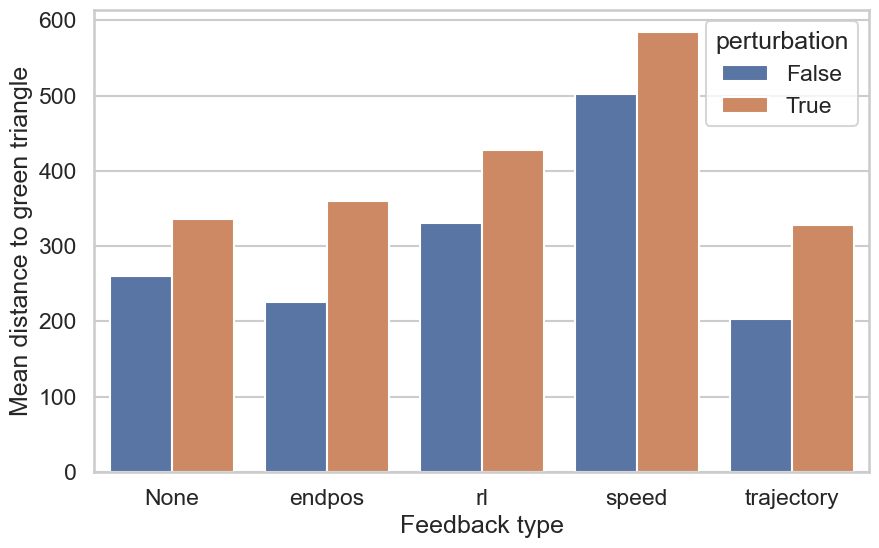

In [39]:
# Calculate summary statistics
summary_main = df.groupby(['feedback_type', 'perturbation'])['distance_to_green_triangle'].agg(['mean', 'std']).reset_index()
print("\n### Mean and Standard Deviation for each feedback type and perturbation type###\n")
print(summary_main)

# Set Seaborn theme
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary_main, 
    x='feedback_type', 
    y='mean', 
    hue='perturbation', 
)

# Labels
plt.xlabel('Feedback type')
plt.ylabel('Mean distance to green triangle')

# Show plot
plt.show()
